In [2]:
import pandas as pd
import numpy as np
from calendar import *
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


##### Import Data

In [3]:
t_data = pd.read_csv('spotify_2022_clean.csv')

#the read statements generate pandas dataframes

In [4]:
type(t_data)
t_data.head(3)

#### Prep Data for Visualization

In [5]:
data22 = t_data.drop(columns = 'Unnamed: 0')

In [6]:
data22.head(3)

,Artist,Track,Runtime (mins),Date,Time,DateTime,msPlayed,Day
0,1A,"When A Kid Takes A Gun, Who's Responsible?",33.11,2021-12-11,22:08,2021-12-11 22:08:00,1986784,Saturday
1,1A,"The News Roundup for December 10, 2021",62.39,2021-12-12,16:48,2021-12-12 16:48:00,3743130,Sunday
2,1A,"The News Roundup for December 10, 2021",18.57,2021-12-12,21:40,2021-12-12 21:40:00,1113944,Sunday


In [7]:
# CYA Cast for Main df

data22['DateTime'] = pd.to_datetime(data22['DateTime'])
data22['Date'] = pd.to_datetime(data22['Date'])
data22['Time'] = pd.to_datetime(data22['DateTime']).dt.time

In [8]:
data22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Artist          8724 non-null   object        
 1   Track           8724 non-null   object        
 2   Runtime (mins)  8724 non-null   float64       
 3   Date            8724 non-null   datetime64[ns]
 4   Time            8724 non-null   object        
 5   DateTime        8724 non-null   datetime64[ns]
 6   msPlayed        8724 non-null   int64         
 7   Day             8724 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 545.4+ KB


In [9]:
data22.nunique()
# this dataset doesn't have the 'index' column at the end because it is the original index, I wanted a clean index for the
# extraction df's so they have a newly reset index and put their original position at the end jic

Artist             488
Track             2769
Runtime (mins)    1992
Date               316
Time              1416
DateTime          8140
msPlayed          4621
Day                  7
dtype: int64

###### Create Categorical Buckets

In [10]:
## Binned Data by Time of Day

bins = [0, 7, 12, 17, 20, 24]

labels = ['Overnight', 'Morning', 'Daytime', 'Evening', 'Night']

data22['ToD'] = pd.cut(data22.DateTime.dt.hour, bins, labels=labels, right=False)

data22

,Artist,Track,Runtime (mins),Date,Time,DateTime,msPlayed,Day,ToD
0,1A,"When A Kid Takes A Gun, Who's Responsible?",33.11,2021-12-11,22:08:00,2021-12-11 22:08:00,1986784,Saturday,Night
1,1A,"The News Roundup for December 10, 2021",62.39,2021-12-12,16:48:00,2021-12-12 16:48:00,3743130,Sunday,Daytime
2,1A,"The News Roundup for December 10, 2021",18.57,2021-12-12,21:40:00,2021-12-12 21:40:00,1113944,Sunday,Night
3,1A,"The News Roundup for December 10, 2021",17.39,2021-12-12,22:32:00,2021-12-12 22:32:00,1043458,Sunday,Night
4,Megan Thee Stallion,Thot Shit,3.34,2021-12-12,22:36:00,2021-12-12 22:36:00,200411,Sunday,Night
...,...,...,...,...,...,...,...,...,...
8719,Up First,"Saturday, December 10, 2022",14.49,2022-12-11,04:45:00,2022-12-11 04:45:00,869656,Sunday,Overnight
8720,Offline with Jon Favreau,Is This the End of Social Media? With Ian Bogost,45.15,2022-12-11,19:26:00,2022-12-11 19:26:00,2709278,Sunday,Evening
8721,Jordan Klepper Fingers the Conspiracy,Hunter Biden's Laptop,81.51,2022-12-11,20:49:00,2022-12-11 20:49:00,4890538,Sunday,Night
8722,The Read,YT Assistance,80.56,2022-12-11,22:11:00,2022-12-11 22:11:00,4833760,Sunday,Night


In [11]:
podcasts = ['1A','FiveThirtyEight Politics','The NPR Politics Podcast','Throughline','The Professional Chatterbox',
'You\'re Wrong About','Code Switch','Fresh Air','Beyond the Scenes from The Daily Show','Harry, Meghan and the Media',
'Off The Rails','Gossip with Celebitchy','The Royal Report','Bryony Gordon\'s Mad World','Higher Learning with Van Lathan and Rachel Lindsay',
'Disclosure','The Rachel Maddow Show','Archewell Audio','By The Book','The Man Enough Podcast','The Problem With Jon Stewart','Offline with Jon Favreau',
'Maintenance Phase','Armchair Expert with Dax Shepard','Conversations with People Who Hate Me','Sounds Like A Cult',
'Masters of Scale','Queens Cast','The Read','All In with Chris Hayes','QAnon Anonymous','Swindled','Life After MLM',
'Fit Literate','The Up-Beet Dietitians','Con Artists','Pod Save America','Up First','All Songs Considered',
'Pod Save the World','Downline','Into It: A Vulture Podcast with Sam Sanders', 'Criminal','The Ezra Klein Show',
'How It Happened','Truthers: Tiffany Dover Is Dead*','Notes from America','The Receipts Podcast', 'The Cut',
'The New Way We Work','Embedded', 'Pop Culture Happy Hour','Mythology','Archetypes','Larry Wilmore: Black on the Air',
'Louder Than A Riot','Stranger Fruit Voices','You and Me Both with Hillary Clinton','Dates & Mates with Damona Hoffman','The Wilderness' 'Maths Time Joy',
 'Make Me Smart', 'Bloomberg Businessweek','The Inquiry','The Gal Code','Strict Scrutiny', 'Hard Fork', "James O'Brien - The Whole Show",
 "I'ma Need More Wine Podcast",'Metro Morning from CBC Radio Toronto (Highlights)','CBC News At Issue','Front Burner','The House from CBC Radio',
 'The Daily Show With Trevor Noah: Ears Edition','If Books Could Kill','Around The Way Curls','On with Kara Swisher',
 'Why Is This Happening? The Chris Hayes Podcast','The Stoop','Jordan Klepper Fingers the Conspiracy','Vibe Check','Pivot','BYLINE TIMES PODCAST','Your Undivided Attention'
 ]

In [12]:
#add a column to the table 
data22['Type'] = None

data22['Type'] =  np.where(data22['Artist'].isin(podcasts), 'Podcast', 'Music')

In [13]:
data22.head(10)

,Artist,Track,Runtime (mins),Date,Time,DateTime,msPlayed,Day,ToD,Type
0,1A,"When A Kid Takes A Gun, Who's Responsible?",33.11,2021-12-11,22:08:00,2021-12-11 22:08:00,1986784,Saturday,Night,Podcast
1,1A,"The News Roundup for December 10, 2021",62.39,2021-12-12,16:48:00,2021-12-12 16:48:00,3743130,Sunday,Daytime,Podcast
2,1A,"The News Roundup for December 10, 2021",18.57,2021-12-12,21:40:00,2021-12-12 21:40:00,1113944,Sunday,Night,Podcast
3,1A,"The News Roundup for December 10, 2021",17.39,2021-12-12,22:32:00,2021-12-12 22:32:00,1043458,Sunday,Night,Podcast
4,Megan Thee Stallion,Thot Shit,3.34,2021-12-12,22:36:00,2021-12-12 22:36:00,200411,Sunday,Night,Music
5,Chlöe,Have Mercy,2.48,2021-12-12,22:38:00,2021-12-12 22:38:00,148778,Sunday,Night,Music
6,Jesy Nelson,Boyz (feat. Nicki Minaj),0.40,2021-12-12,22:38:00,2021-12-12 22:38:00,23754,Sunday,Night,Music
7,Chlöe,Have Mercy,2.16,2021-12-12,22:41:00,2021-12-12 22:41:00,129702,Sunday,Night,Music
8,SZA,The Weekend,4.38,2021-12-13,15:58:00,2021-12-13 15:58:00,262826,Monday,Daytime,Music
9,SZA,Go Gina,1.27,2021-12-13,15:59:00,2021-12-13 15:59:00,76095,Monday,Daytime,Music


In [15]:
# Checking that number of podcasts/music is consistent

data22.groupby('Type').size()

Type
Music      7134
Podcast    1590
dtype: int64

In [18]:
# Query for Types

music22 = data22.query('Type == "Music"')
music22

pods22 = data22.query('Type == "Podcast"')
pods22

,Artist,Track,Runtime (mins),Date,Time,DateTime,msPlayed,Day,ToD,Type
0,1A,"When A Kid Takes A Gun, Who's Responsible?",33.11,2021-12-11,22:08:00,2021-12-11 22:08:00,1986784,Saturday,Night,Podcast
1,1A,"The News Roundup for December 10, 2021",62.39,2021-12-12,16:48:00,2021-12-12 16:48:00,3743130,Sunday,Daytime,Podcast
2,1A,"The News Roundup for December 10, 2021",18.57,2021-12-12,21:40:00,2021-12-12 21:40:00,1113944,Sunday,Night,Podcast
3,1A,"The News Roundup for December 10, 2021",17.39,2021-12-12,22:32:00,2021-12-12 22:32:00,1043458,Sunday,Night,Podcast
82,Your Undivided Attention,A Conversation with Facebook Whistleblower Fra...,47.33,2021-12-13,21:58:00,2021-12-13 21:58:00,2839786,Monday,Night,Podcast
...,...,...,...,...,...,...,...,...,...,...
8719,Up First,"Saturday, December 10, 2022",14.49,2022-12-11,04:45:00,2022-12-11 04:45:00,869656,Sunday,Overnight,Podcast
8720,Offline with Jon Favreau,Is This the End of Social Media? With Ian Bogost,45.15,2022-12-11,19:26:00,2022-12-11 19:26:00,2709278,Sunday,Evening,Podcast
8721,Jordan Klepper Fingers the Conspiracy,Hunter Biden's Laptop,81.51,2022-12-11,20:49:00,2022-12-11 20:49:00,4890538,Sunday,Night,Podcast
8722,The Read,YT Assistance,80.56,2022-12-11,22:11:00,2022-12-11 22:11:00,4833760,Sunday,Night,Podcast


In [20]:
# # Rename 'artist' &  'track' columns for  Pocasts
pods22 = pods22.rename(columns= {'Artist': 'Show', 'Track': 'Episode'})


In [21]:
#Top 20 Artists
top_artists = music22.groupby(['Artist']).size().reset_index(name = 'Counts')
top_artists = top_artists.sort_values('Counts', ascending = False)

#Top 20 Songs
top_songs = music22.groupby(['Track']).size().reset_index(name = 'Counts')
top_songs = top_songs.sort_values('Counts', ascending = False)

#Top 20 Podcasts
top_podcasts = pods22.groupby(['Show']).size().reset_index(name = 'Counts')
top_podcasts = top_podcasts.sort_values('Counts', ascending = False)

#Top 20 Episodes
top_episodes = pods22.groupby(['Episode']).size().reset_index(name = 'Counts')
top_episodes = top_episodes.sort_values('Counts', ascending = False)

#Top 20 Overall
top_performer = data22.groupby(['Artist']).size().reset_index(name = 'Counts')
top_performer = top_performer.sort_values('Counts', ascending = False)

#Top 20 Overall
top_track = data22.groupby(['Track']).size().reset_index(name = 'Counts')
top_track = top_track.sort_values('Counts', ascending = False)

In [22]:
print(top_performer.head(20))

                       Artist  Counts
43                    Beyoncé    1593
476                     Yebba     303
430  The NPR Politics Podcast     274
6                       Adele     265
186              James Arthur     224
143               Frank Ocean     220
1                          1A     218
107            Dermot Kennedy     199
455             Tracy Chapman     158
138  FiveThirtyEight Politics     151
461                  Up First     144
377                 Sam Smith     142
71                    Cardi B     137
304            Mumford & Sons     129
479  Your Undivided Attention     112
294       Megan Thee Stallion     105
56                     Brandy     103
79            Chris Stapleton     101
64                  Burna Boy      95
195          Jazmine Sullivan      94


In [23]:
print(top_track.head(20))

                                                  Track  Counts
268                                       BREAK MY SOUL     108
646                                 ENERGY (feat. Beam)      98
412                                         CHURCH GIRL      98
415                                             CUFF IT      88
132                                 ALL UP IN YOUR MIND      85
1630                               PLASTIC OFF THE SOFA      85
135                               AMERICA HAS A PROBLEM      83
710                                           Evergreen      71
896                                              HEATED      70
1380                    MOVE (feat. Grace Jones & Tems)      67
2414                                     VIRGO'S GROOVE      67
1998                                             THIQUE      64
1799                                 SUMMER RENAISSANCE      61
414                                                COZY      60
131                                     

In [24]:
print(top_artists.head(20))

                  Artist  Counts
35               Beyoncé    1593
399                Yebba     303
5                  Adele     265
155         James Arthur     224
122          Frank Ocean     220
90        Dermot Kennedy     199
382        Tracy Chapman     158
326            Sam Smith     142
58               Cardi B     137
264       Mumford & Sons     129
255  Megan Thee Stallion     105
46                Brandy     103
66       Chris Stapleton     101
53             Burna Boy      95
163     Jazmine Sullivan      94
311              Rihanna      91
336                  Sia      84
195        Kelly Rowland      75
360          The Carters      70
63         Chloe x Halle      69


In [25]:
print(top_songs.head(20))

                                                  Track  Counts
123                                       BREAK MY SOUL     108
387                                 ENERGY (feat. Beam)      98
230                                         CHURCH GIRL      98
233                                             CUFF IT      88
1035                               PLASTIC OFF THE SOFA      85
36                                  ALL UP IN YOUR MIND      85
39                                AMERICA HAS A PROBLEM      83
414                                           Evergreen      71
543                                              HEATED      70
868                     MOVE (feat. Grace Jones & Tems)      67
1470                                     VIRGO'S GROOVE      67
1298                                             THIQUE      64
1147                                 SUMMER RENAISSANCE      61
232                                                COZY      60
929                                     

In [26]:
print(top_podcasts.head(20))

                                                 Show  Counts
62                           The NPR Politics Podcast     274
0                                                  1A     218
20                           FiveThirtyEight Politics     151
74                                           Up First     144
79                           Your Undivided Attention     112
36                                  Maintenance Phase      84
3                                          Archetypes      64
64                       The Problem With Jon Stewart      38
67                                           The Read      37
46                                   Pod Save America      36
23                             Gossip with Celebitchy      31
43                           Offline with Jon Favreau      30
31                     James O'Brien - The Whole Show      29
5                    Armchair Expert with Dax Shepard      25
13                                        Code Switch      23
26  High

In [27]:
print(top_episodes.head(20))

                                                Episode  Counts
772   The Misconception of Ambition with Serena Will...      13
736               The Duality of Diva with Mariah Carey       9
708   The Audacity of the Activist with Jameela Jami...       8
570                   News Roundup for January 28, 2022       7
896   Tim Miller on 'Why We Did It: A Travelogue fro...       6
348   Good Wife/Bad Wife, Good Mom/Bad Mom with Soph...       6
776                             The NeverEnding Episode       6
493          Kathleen Belew (white supremacy historian)       6
858                      The Wellness to QAnon Pipeline       5
180                   Brian Klaas (political scientist)       5
730   The Demystification of Dragon Lady with Margar...       5
90    A Renegade Solution to Extractive Economics — ...       5
690   Spotlight — The Facebook Files with Tristan Ha...       4
190              Cathy O'Neil (data scientist on shame)       4
666   School Lunches, P-Hacking and the 

In [28]:
data22.groupby([data22["ToD"]])["Runtime (mins)"].sum()

ToD
Overnight    16634.64
Morning       4474.54
Daytime      16086.78
Evening      17268.26
Night        20340.22
Name: Runtime (mins), dtype: float64

In [29]:
data22.groupby([data22["ToD"]])["Runtime (mins)"].mean()

ToD
Overnight     6.543918
Morning       4.695215
Daytime      10.611332
Evening      10.587529
Night         9.769558
Name: Runtime (mins), dtype: float64

##### Custom Tables for Viz.

In [35]:
daily_listen = data22.resample('D', on='Date').agg({'Runtime (mins)': 'sum'})

daily_listen

,Runtime (mins)
Date,
2021-12-11,33.11
2021-12-12,106.73
2021-12-13,321.73
2021-12-14,0.00
2021-12-15,3.25
...,...
2022-12-08,0.00
2022-12-09,228.77
2022-12-10,472.70


In [36]:
daily_listen.describe()

,Runtime (mins)
count,367.000000
mean,203.826812
std,181.815398
min,0.000000
25%,40.980000
50%,172.090000
75%,308.890000
max,876.230000


#### First Visualizations

###### Listening Time

<AxesSubplot:xlabel='Date'>

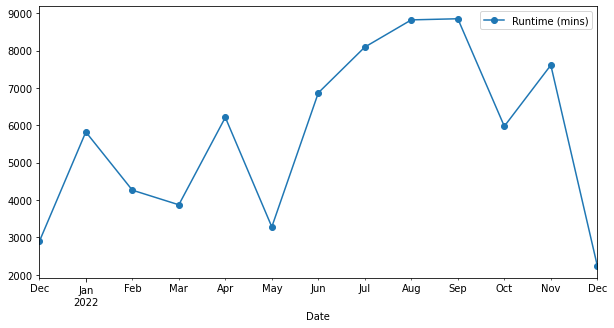

In [44]:
# Listening time by month:
## ONCE I SOLVE THE RUNTIME ISSUE, replace it in the assignment of the daily_listen df for
## these charts

daily_listen.resample('M').sum().plot(style='-o', figsize=(10,5))

<AxesSubplot:xlabel='Date'>

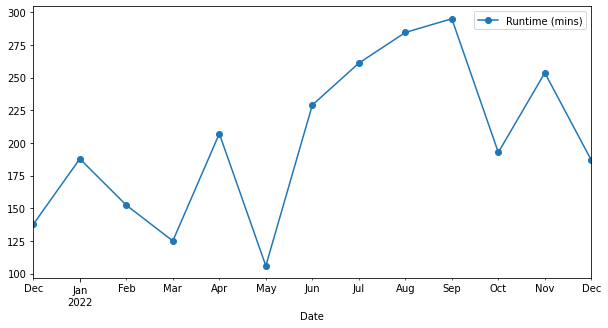

In [45]:
daily_listen.resample('M').mean().plot(style='-o', figsize=(10,5))

In [47]:
lt_day = data22.groupby(['Day']).size().reset_index(name="minutes")
print(lt_day)

# This output is sorted in alphabetical order, I can resort

         Day  minutes
0     Friday     1389
1     Monday     1005
2   Saturday     1292
3     Sunday     1999
4   Thursday      866
5    Tuesday      988
6  Wednesday     1185


In [48]:
lt_day = data22.groupby(['Day']).size().reset_index(name="Time (min)").sort_values(['Time (min)'], ascending= False)
print(lt_day)

# resorted

         Day  Time (min)
3     Sunday        1999
0     Friday        1389
2   Saturday        1292
6  Wednesday        1185
1     Monday        1005
5    Tuesday         988
4   Thursday         866


<AxesSubplot:xlabel='Day', ylabel='Time (min)'>

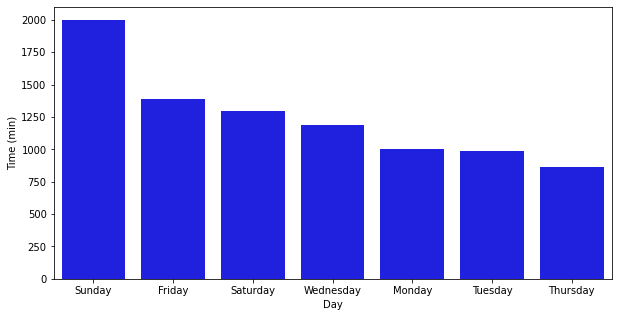

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day', y='Time (min)', data=lt_day, color='blue')

In [50]:
lt_tod = data22.groupby(['ToD']).size().reset_index(name="minutes")
print(lt_tod)

         ToD  minutes
0  Overnight     2542
1    Morning      953
2    Daytime     1516
3    Evening     1631
4      Night     2082


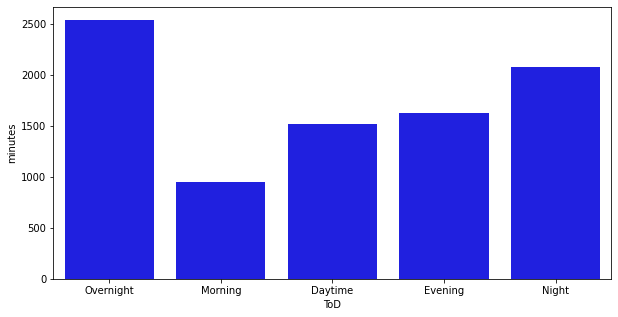

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='ToD', y='minutes', data= lt_tod, color='blue')
plt.show()

# now do it in two by type

<AxesSubplot:xlabel='Type', ylabel='count'>

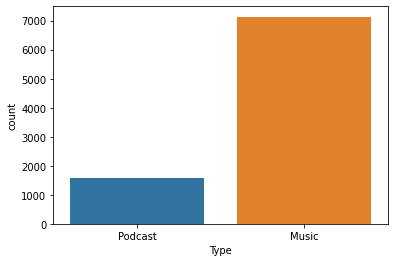

In [52]:
# The number of rows by type -  refactor this
sns.countplot(x='Type', data=data22)

In [55]:
dl1 = data22.groupby('Type').resample('M', on='Date').agg({'Runtime (mins)': 'sum'}) #JACKPOT

dl1

Runtime (mins)
Type    Date                      
Music   2021-12-31         1447.67
        2022-01-31         3243.40
        2022-02-28         2383.12
        2022-03-31         2541.02
        2022-04-30         3541.25
        2022-05-31         1308.54
        2022-06-30         3060.60
        2022-07-31         2895.43
        2022-08-31         3424.78
        2022-09-30         2104.52
        2022-10-31         1486.81
        2022-11-30         1027.55
        2022-12-31          320.53
Podcast 2021-12-31         1444.63
        2022-01-31         2578.47
        2022-02-28         1882.50
        2022-03-31         1333.11
        2022-04-30         2670.29
        2022-05-31         1974.64
        2022-06-30         3808.32
        2022-07-31         5197.11
        2022-08-31         5395.40
        2022-09-30         6745.65
        2022-10-31         4487.22
        2022-11-30         6581.48
        2022-12-31         1920.40

<AxesSubplot:xlabel='Date', ylabel='Runtime (mins)'>

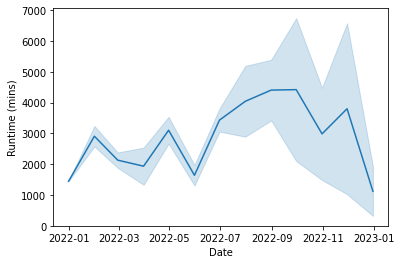

In [56]:
sns.lineplot(data=dl1, x='Date', y='Runtime (mins)', palette='blue')

<AxesSubplot:xlabel='Date', ylabel='Runtime (mins)'>

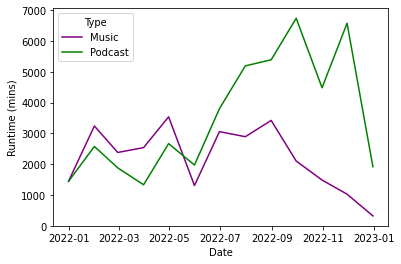

In [57]:
sns.lineplot(data=dl1, x='Date', y='Runtime (mins)', hue='Type', palette=['purple', 'green'])

###### Top Artists/Show

In [110]:
# Top 5 Artists - count of appearances in the table

top_artists.head(5)

,Artist,Counts
35,Beyoncé,1593
399,Yebba,303
5,Adele,265
155,James Arthur,224
122,Frank Ocean,220


In [62]:
top5 = top_songs.head(5)

<AxesSubplot:xlabel='Day', ylabel='Runtime (mins)'>

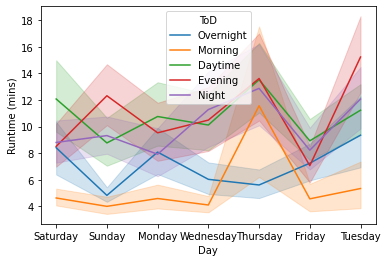

In [67]:
sns.lineplot(data=data22, x='Day', y='Runtime (mins)', hue='ToD')
# refactor